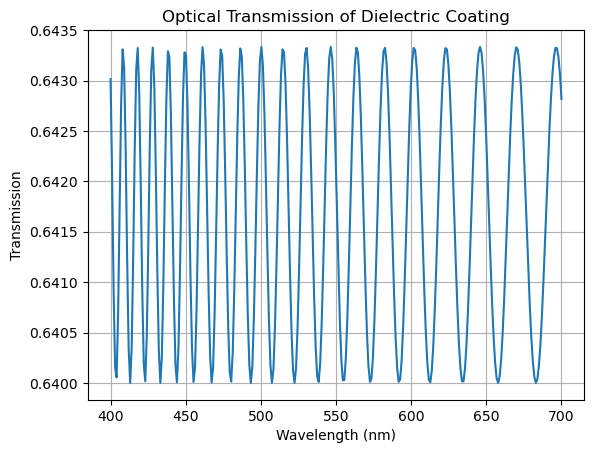

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_transmission(n, d, num_layers, wavelengths):
    # Constants
    n0 = 1.0  # Refractive index of the incident medium (air)
    ns = 1.5  # Refractive index of the substrate

    # Calculate the transmission for each wavelength
    transmission = []
    for wavelength in wavelengths:
        # Calculate the phase thickness
        delta = 2 * np.pi * n * d / wavelength

        # Calculate the characteristic matrix for a single layer
        M = np.array([[np.cos(delta), 1j * np.sin(delta) / n],
                      [1j * n * np.sin(delta), np.cos(delta)]])

        # Calculate the characteristic matrix for the entire stack
        M_total = np.linalg.matrix_power(M, num_layers)

        # Calculate the transmission coefficient
        t = 2 * n0 / (M_total[0, 0] * n0 + M_total[0, 1] * ns + M_total[1, 0] * n0 + M_total[1, 1] * ns)
        T = np.abs(t)**2

        transmission.append(T)

    return transmission

# User inputs
#n = float(input("Enter the refractive index of the coating: "))
#d = float(input("Enter the thickness of each layer (in nm): "))
#num_layers = int(input("Enter the number of layers: "))

n = 1.48
d = 1500
num_layers = 4



# Wavelength range (in nm)
wavelengths = np.linspace(400, 700, 300)

# Calculate transmission
transmission = calculate_transmission(n, d, num_layers, wavelengths)

# Plot the results
plt.plot(wavelengths, transmission)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.title('Optical Transmission of Dielectric Coating')
plt.grid(True)
plt.show()